# Audio Processing - Exercise

**Nama     : Harisya Miranti**

**NIM      : 122140049**

---

# Deskripsi Tugas

Notebook ini dirancang untuk menjelajahi konsep-konsep fundamental dalam pemrosesan audio digital. Kita akan mempraktikkan berbagai teknik untuk memanipulasi, menyaring (filter), dan menganalisis sinyal audio.

### Soal 1: Rekaman dan Analisis Suara Multi-Level

#### 1.1 Visualisasi Waveform dan Spectrogram

Sample rate: 22050 Hz


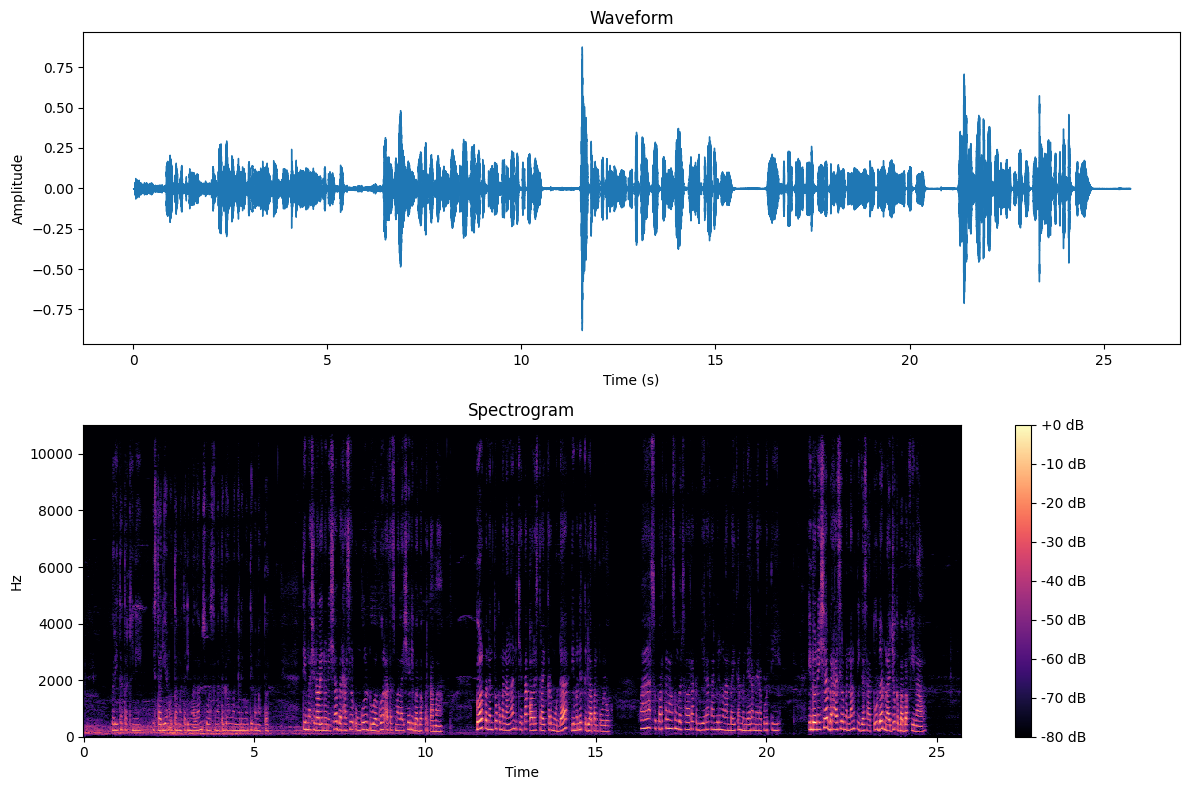

In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

base_dir = Path.cwd()
audio_path = base_dir / "data" / "audio.wav"  

y, sr = librosa.load(audio_path)
print(f"Sample rate: {sr} Hz")

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')

plt.tight_layout()
plt.show()

 waveform dan spektrogram diatas menampilkan rekaman suara multi-level dalam 25 detik, terlihat jelas perbedaan karakter suara di tiap segmen 5 detik. Pada 5 detik pertama dengan nada berbisik, amplitudo kecil dan spektrogram gelap—artinya energi suara sangat rendah. Di 5 detik kedua dengan suara normal, amplitudo naik stabil dan spektrogram mulai terang di frekuensi menengah. Saat suara keras (10–15 detik), amplitudo membesar dan spektrogram menyebar ke frekuensi tinggi. Pada suara cempreng (15–20 detik), spektrogram dominan di frekuensi tinggi dengan pola rapat, menunjukkan nada dibuat lebih melengking. Terakhir, saat berteriak (20–25 detik), amplitudo mencapai puncak dan spektrogram paling terang di hampir semua frekuensi—bukti energi suara maksimal. 

#### 1.2 Resampling Audio

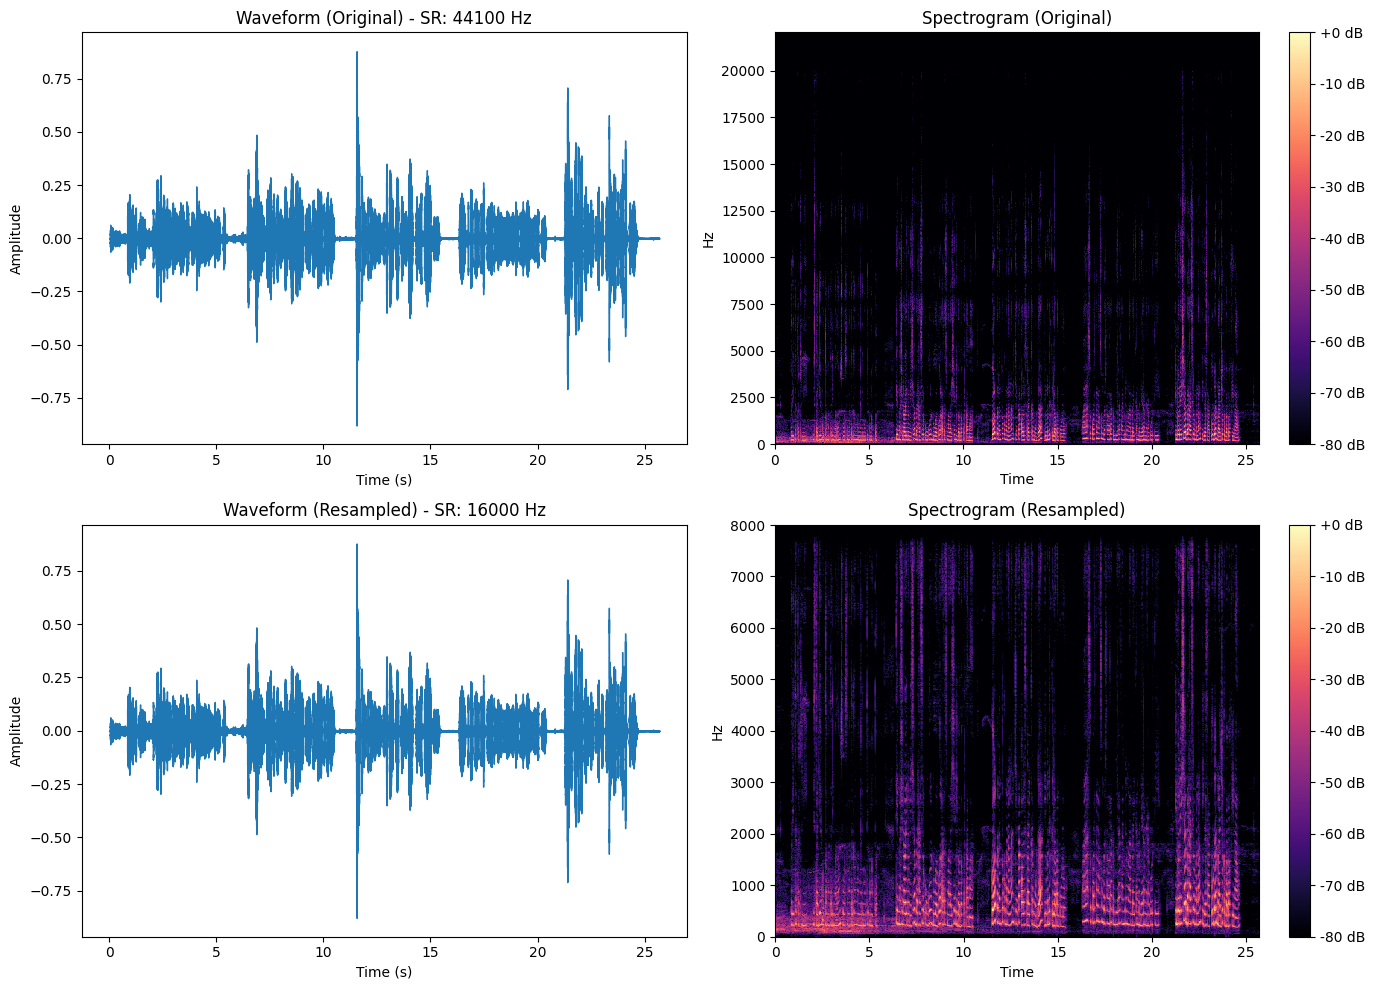

In [9]:
import soundfile as sf

target_sr = 16000
y_resampled = librosa.resample(y, orig_sr=sr, target_sr=target_sr)
sf.write("data/audio_resampled.wav", y_resampled, target_sr)

# Visualisasi perbandingan
plt.figure(figsize=(14, 10))

# Original
plt.subplot(2, 2, 1)
librosa.display.waveshow(y, sr=sr)
plt.title(f'Waveform (Original) - SR: {sr} Hz')
plt.xlabel('Time (s)')-
plt.ylabel('Amplitude')

plt.subplot(2, 2, 2)
D_orig = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D_orig, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram (Original)')

# Resampled
plt.subplot(2, 2, 3)
librosa.display.waveshow(y_resampled, sr=target_sr)
plt.title(f'Waveform (Resampled) - SR: {target_sr} Hz')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 4)
D_resamp = librosa.amplitude_to_db(np.abs(librosa.stft(y_resampled)), ref=np.max)
librosa.display.specshow(D_resamp, sr=target_sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram (Resampled)')

plt.tight_layout()
plt.show()

Jika dilihat dari spectrpgram diatas, terlihat ada penurunan signifikan. Di spektrogram hasil resampling, batas atas frekuensi terpotong jadi cuma sampai 8 kHz, padahal di versi asli masih bisa sampai 20 kHz. Artinya, detail suara tinggi kayak nada cempreng atau teriakan jadi kurang tajam dan lebih berdengnung.

### Soal 2: Noise Reduction dengan Filtering

#### 2.1 Filter Equalisasi (High-pass, Low-pass, Band-pass)

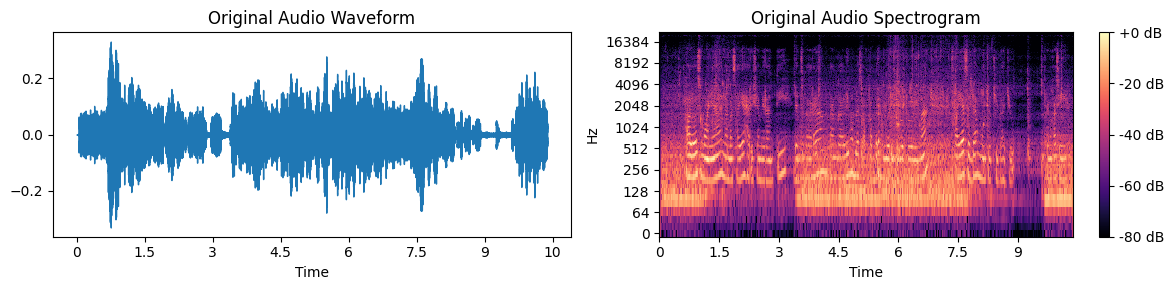

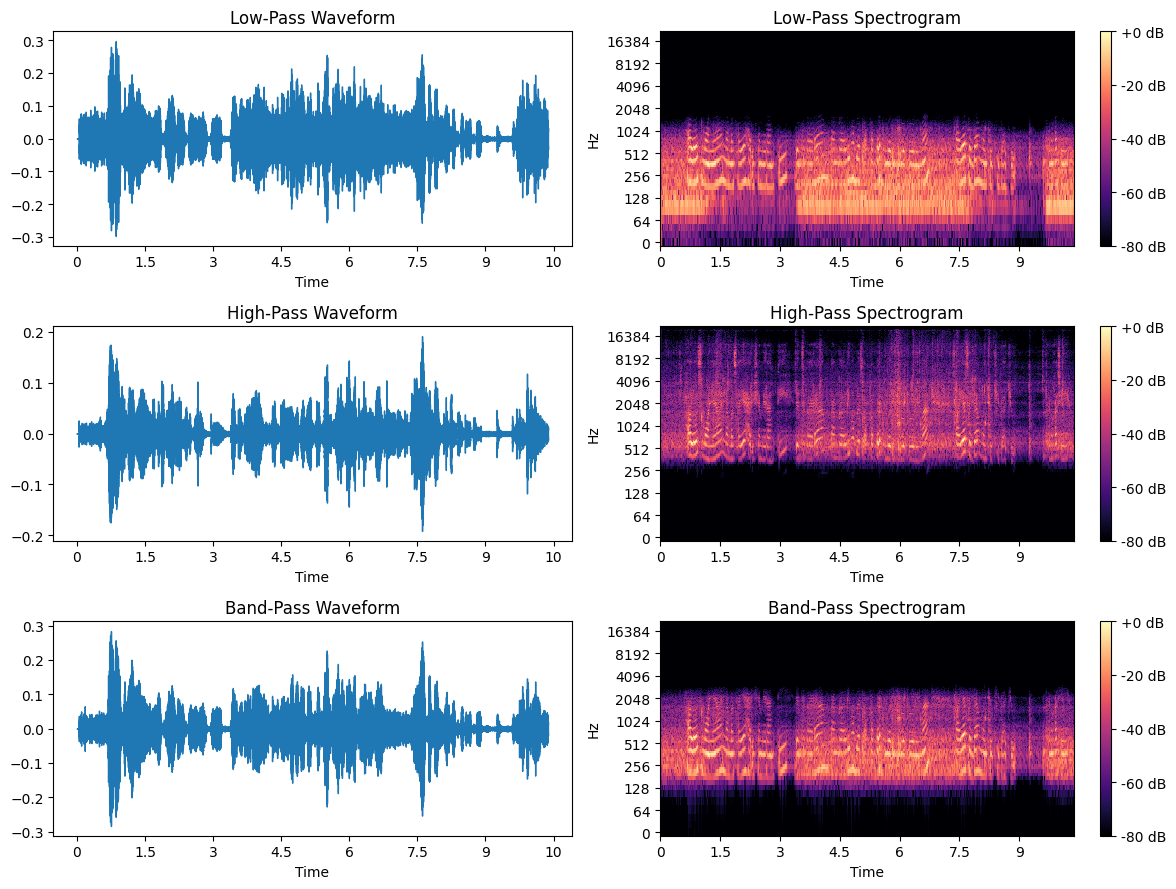

In [3]:
from scipy.signal import butter, filtfilt

audio_path = base_dir / "data" / "noise.wav"
y, sr = librosa.load(audio_path, sr=None)

# Tampilkan audio asli
fig, ax = plt.subplots(1, 2, figsize=(12, 3))
librosa.display.waveshow(y, sr=sr, ax=ax[0])
ax[0].set_title("Original Audio Waveform")

S = np.abs(librosa.stft(y))
S_db = librosa.amplitude_to_db(S, ref=np.max)
img = librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', ax=ax[1])
ax[1].set_title("Original Audio Spectrogram")
fig.colorbar(img, ax=ax[1], format="%+2.0f dB")
plt.tight_layout()
plt.show()

def apply_filter(y, sr, btype, cutoff):
    nyq = 0.5 * sr
    if btype == 'band':
        low, high = np.array(cutoff) / nyq
        b, a = butter(5, [low, high], btype=btype)
    else:
        normal_cutoff = cutoff / nyq
        b, a = butter(5, normal_cutoff, btype=btype)
    return filtfilt(b, a, y)

# Terapkan filter
low_pass = apply_filter(y, sr, 'low', 1000)
high_pass = apply_filter(y, sr, 'high', 500)
band_pass = apply_filter(y, sr, 'band', (200, 2000))

# Simpan
sf.write("data/noisy_lowpass.wav", low_pass, sr)
sf.write("data/noisy_highpass.wav", high_pass, sr)
sf.write("data/noisy_bandpass.wav", band_pass, sr)

# Visualisasi
filters = [(low_pass, "Low-Pass"), (high_pass, "High-Pass"), (band_pass, "Band-Pass")]
fig, axes = plt.subplots(3, 2, figsize=(12, 9))
for i, (data, title) in enumerate(filters):
    librosa.display.waveshow(data, sr=sr, ax=axes[i, 0])
    axes[i, 0].set_title(f"{title} Waveform")
    
    S_db = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
    img = librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', ax=axes[i, 1])
    axes[i, 1].set_title(f"{title} Spectrogram")
    fig.colorbar(img, ax=axes[i, 1], format="%+2.0f dB")

plt.tight_layout()
plt.show()

Berdasarkan hasil visualisasi, rekaman audio asli dengan jelas menunjukkan adanya gangguan suara mesin cuci yang konstan pada frekuensi rendah, terlihat seperti garis tebal terang di bagian bawah spektrogram. Penggunaan Low-Pass filter ternyata tidak efektif karena justru menghilangkan detail penting dari suara vokal di frekuensi atas dan membiarkan suara gemuruh mesin cuci tetap ada. Sebaliknya, High-Pass filter menjadi solusi terbaik karena berhasil memotong habis suara gemuruh di frekuensi rendah, sehingga suara vokal menjadi jauh lebih jernih dan fokus. Sementara itu, Band-Pass filter juga memberikan hasil yang sangat baik dengan cara mengisolasi rentang frekuensi utama suara manusia, membuang suara gemuruh di bawah dan potensi desis di atas.

####  2.2 Eksperimen dengan Cutoff 500 Hz, 1000 Hz, 2000 Hz

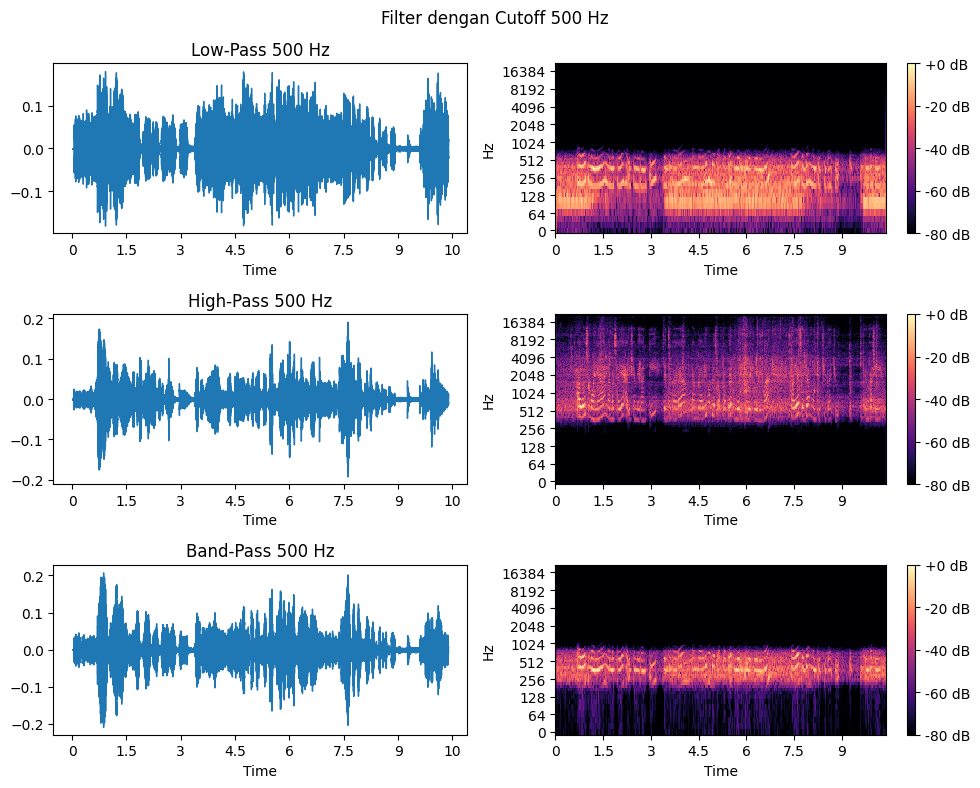

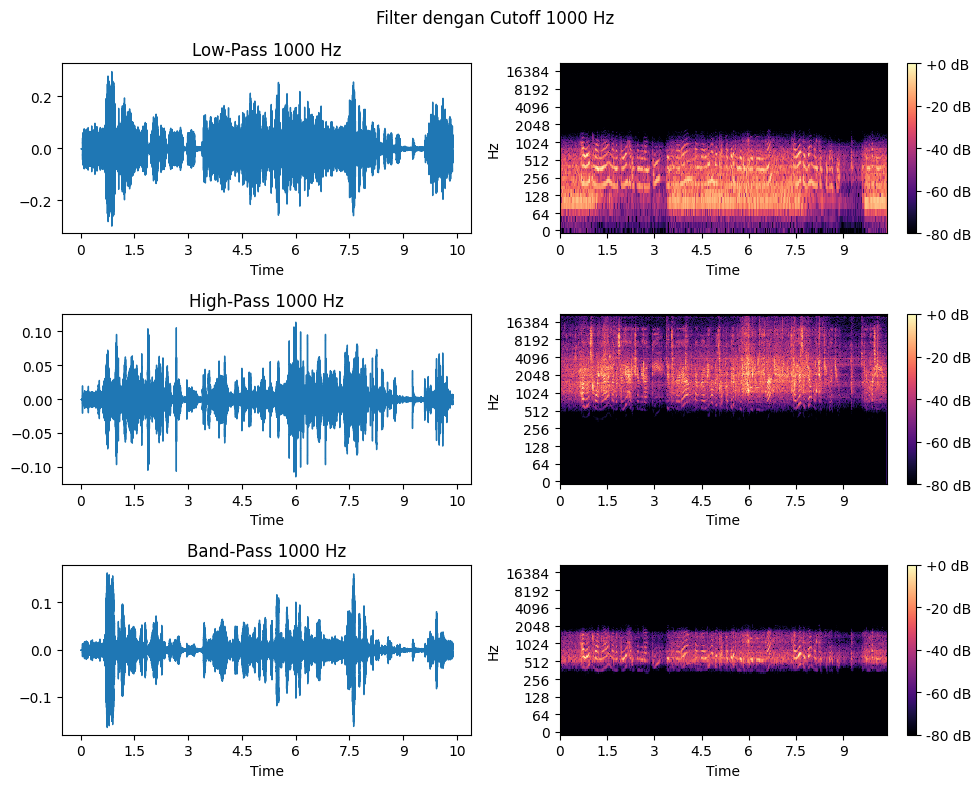

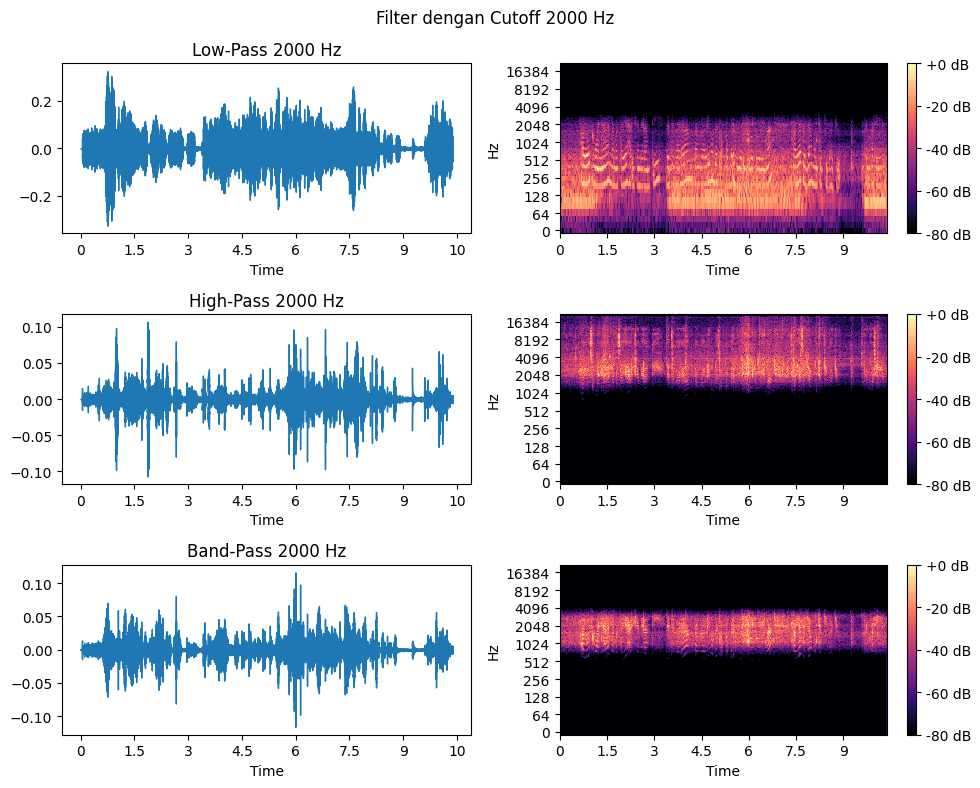

In [4]:
cutoff_values = [500, 1000, 2000]

for cutoff in cutoff_values:
    filters = {
        'low': cutoff,
        'high': cutoff,
        'band': (cutoff // 2, int(cutoff * 1.5))
    }
    fig, axes = plt.subplots(3, 2, figsize=(10, 8))
    for i, (ftype, cval) in enumerate(filters.items()):
        y_f = apply_filter(y, sr, ftype, cval if ftype != 'band' else cval)
        sf.write(f"data/noisy_{ftype}pass_{cutoff}Hz.wav", y_f, sr)
        
        librosa.display.waveshow(y_f, sr=sr, ax=axes[i, 0])
        axes[i, 0].set_title(f"{ftype.capitalize()}-Pass {cutoff} Hz")
        
        S_db = librosa.amplitude_to_db(np.abs(librosa.stft(y_f)), ref=np.max)
        img = librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', ax=axes[i, 1])
        fig.colorbar(img, ax=axes[i, 1], format="%+2.0f dB")
    plt.suptitle(f"Filter dengan Cutoff {cutoff} Hz")
    plt.tight_layout()
    plt.show()

Dari semua hasil spektrogram, terlihat jelas bahwa jenis noise yang muncul adalah noise frekuensi rendah. Hal ini terbukti dari warna terang yang konsisten di bagian bawah spektrum pada semua hasil Low-Pass filter. Filter Low-Pass mempertahankan noise ini, sementara filter High-Pass dan Band-Pass secara konsisten berhasil menghilangkannya. Oleh karena itu, kedua filter inilah yang paling efektif untuk mengatasi masalah pada rekaman ini.

**Cutoff 500 Hz:**

Nilai ini tampaknya menjadi titik optimal. High-Pass filter pada 500 Hz berhasil membersihkan hampir seluruh noise gemuruh dari mesin cuci. Yang terpenting, ia masih mempertahankan sebagian besar frekuensi dasar suara vokal, sehingga suara terdengar lebih bersih tanpa menjadi terlalu "tipis" atau cempreng. Ini adalah keseimbangan terbaik antara menghilangkan noise dan menjaga kealamian suara.

**Cutoff 1000 Hz**

Pada 1000 Hz, noise memang sudah benar-benar hilang. Namun, filter ini mulai memotong terlalu banyak frekuensi rendah dari suara vokal.

**Cutoff 2000 Hz:**

Nilai cutoff ini terlalu agresif. Meskipun cutoff 2000 Hz ampuh menghilangkan noise, setelan ini terlalu berlebihan karena juga membuang komponen-komponen inti dari suara asli.

Berdasarkan hasilnnya, Nilai cutoff yang memberikan hasil terbaik adalah 500 Hz.

### Soal 3: Pitch Shifting dan Audio Manipulation

#### 3.1 Pitch Shifting ke Chipmunk (+13 semitone)

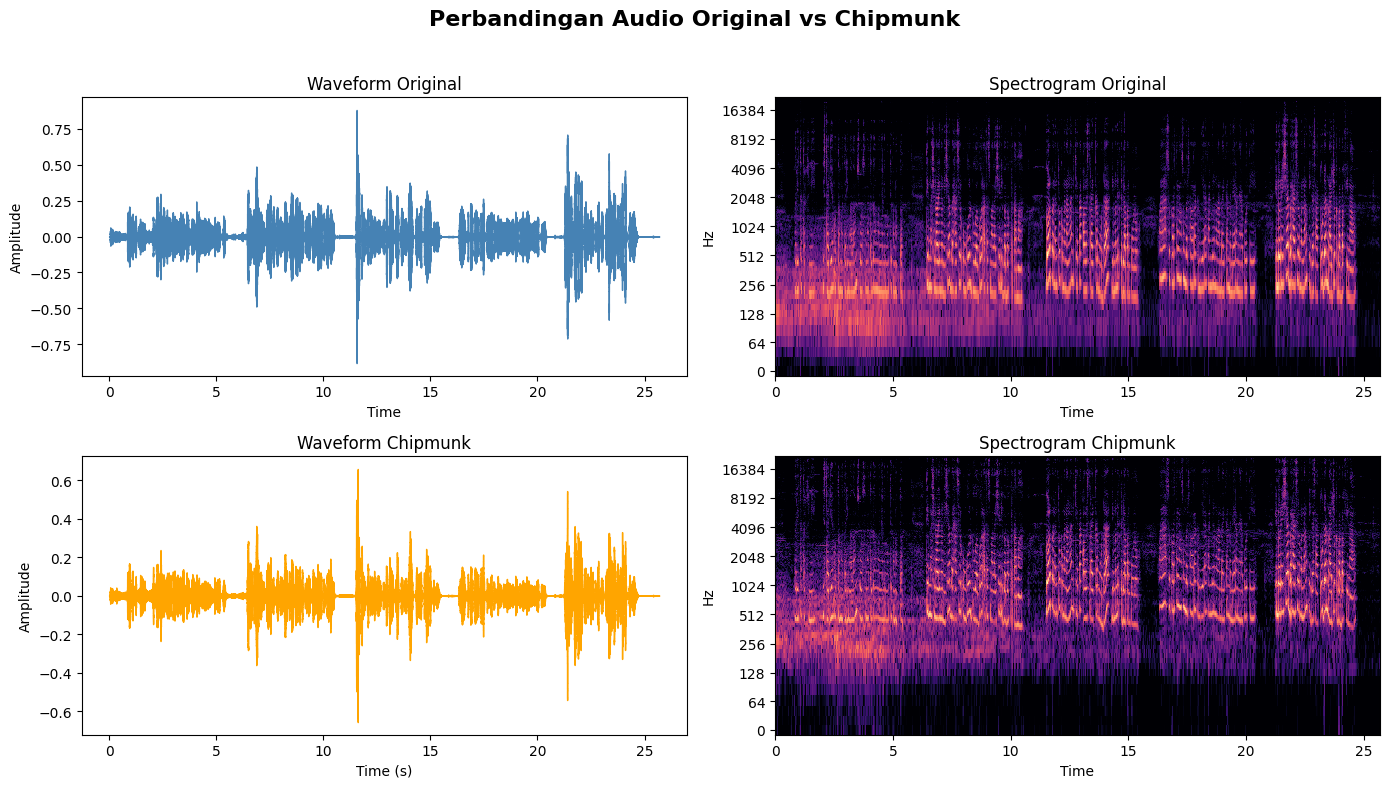

In [5]:
audio_path = base_dir / "data" / "audio.wav"
y, sr = librosa.load(audio_path, sr=None)

y_chipmunk = librosa.effects.pitch_shift(y, sr=sr, n_steps=13)
sf.write("data/audio_chipmunk.wav", y_chipmunk, sr)

# Visualisasi
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
fig.suptitle("Perbandingan Audio Original vs Chipmunk", fontsize=16, fontweight="bold")

librosa.display.waveshow(y, sr=sr, ax=axes[0, 0], color="steelblue")
axes[0, 0].set_title("Waveform Original")
axes[0, 0].set_ylabel("Amplitude")

S_db = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', ax=axes[0, 1])
axes[0, 1].set_title("Spectrogram Original")

librosa.display.waveshow(y_chipmunk, sr=sr, ax=axes[1, 0], color="orange")
axes[1, 0].set_title("Waveform Chipmunk")
axes[1, 0].set_xlabel("Time (s)")
axes[1, 0].set_ylabel("Amplitude")

S2_db = librosa.amplitude_to_db(np.abs(librosa.stft(y_chipmunk)), ref=np.max)
librosa.display.specshow(S2_db, sr=sr, x_axis='time', y_axis='log', ax=axes[1, 1])
axes[1, 1].set_title("Spectrogram Chipmunk")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Menurut saya, proses pitch shifting ini pada dasarnya adalah sebuah teknik untuk mengubah nada suara tanpa membuatnya jadi lebih cepat atau lebih lambat. Dalam tugas ini, tujuannya adalah untuk menciptakan efek suara "chipmunk", jadi, menurut pemahaman saya, nada suaranya harus dinaikkan secara signifikan.

#### 3.2 Dua Pitch: +7 dan +12

In [6]:
y_pitch7 = librosa.effects.pitch_shift(y, sr=sr, n_steps=7)
y_pitch12 = librosa.effects.pitch_shift(y, sr=sr, n_steps=12)

sf.write("data/audio_pitch+7.wav", y_pitch7, sr)
sf.write("data/audio_pitch+12.wav", y_pitch12, sr)

#### 3.3 Gabungkan Kedua Pitch

In [8]:
y1, sr1 = sf.read(base_dir / "data" / "audio_pitch+7.wav")
y2, sr2 = sf.read(base_dir / "data" / "audio_pitch+12.wav")

m = min(len(y1), len(y2))
y_mix = (y1[:m] + y2[:m]) / 2  # rata-rata
y_mix = y_mix / np.max(np.abs(y_mix))  # normalisasi

sf.write(base_dir / "data" / "audio_pitch_mix.wav", y_mix, sr1)

Kode ini pertama-tama membuat dua versi audio baru dengan nada yang lebih tinggi dari rekaman asli, yaitu dengan menaikkan pitch sebesar +7 dan +12 semitones menggunakan fungsi dari pustaka librosa. Kedua hasil tersebut kemudian disimpan sebagai file WAV terpisah. Selanjutnya, kode membaca kembali kedua file bernada tinggi itu, menggabungkannya menjadi satu dengan cara merata-ratakan sinyalnya, lalu melakukan normalisasi untuk memaksimalkan volume tanpa membuat suara pecah.

Pada pergeseran nada +7, suara saya mengalami peningkatan menjadi lebih ringan dan nyaring, namun tetap mempertahankan karakter alaminya. Sebaliknya, pergeseran nada +12 menghasilkan perubahan yang jauh lebih ekstrem, di mana suara menjadi sangat tinggi dan tipis, menyerupai karakteristik efek chipmunk.

Spektrogram menunjukkan distribusi energi suara di berbagai frekuensi. Pada Spectrogram Original, energi vokal (garis-garis horizontal terang) terpusat di frekuensi yang lebih rendah. Setelah proses pitch shifting, seluruh pola energi ini bergeser ke atas pada Spectrogram Chipmunk.

Kualitas suara asli sepenuhnya berubah. Suara kehilangan karakter "manusia"-nya yang alami menjadi tinggi dan melengking.

### Soal 4: Audio Processing Chain

#### 4.1 Proses Audio Chipmunk

In [10]:
def eq(y, sr):
    b, a = butter(4, [300/(0.5*sr), 6000/(0.5*sr)], btype='band')
    return filtfilt(b, a, y)

def gain_fade(y):
    fade = np.linspace(0.8, 1.0, len(y))
    return y * 1.2 * fade

def normalize(y):
    return y / np.max(np.abs(y)) if np.max(np.abs(y)) > 0 else y

def compress(y, threshold=0.2, ratio=4):
    return np.where(np.abs(y) > threshold,
                    np.sign(y) * (threshold + (np.abs(y) - threshold) / ratio),
                    y)

def noise_gate(y, gate=0.02):
    return np.where(np.abs(y) < gate, 0, y)

def trim_silence(y, threshold=0.01):
    idx = np.where(np.abs(y) > threshold)[0]
    return y[idx[0]:idx[-1]] if len(idx) > 0 else y

# Load dan proses
y, sr = librosa.load(base_dir / "data" / "audio_chipmunk.wav", sr=None)
y = eq(y, sr)
y = gain_fade(y)
y = normalize(y)
y = compress(y)
y = noise_gate(y)
y = trim_silence(y)
y = normalize(y)

sf.write(base_dir / "data" / "chipmunk_processed.wav", y, sr)
print("Audio processed disimpan.")

Audio processed disimpan.


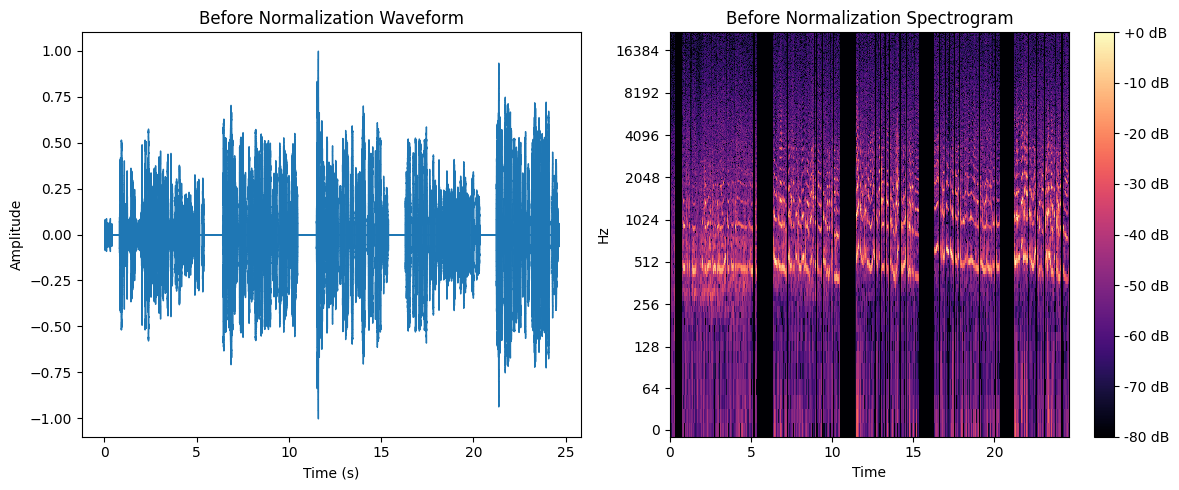

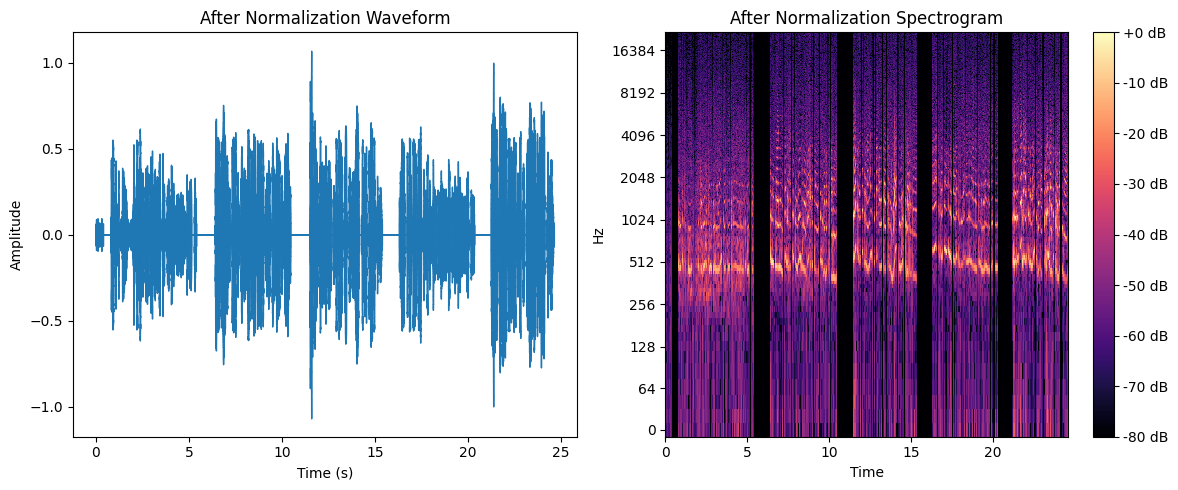

In [11]:
y, sr = librosa.load(base_dir / "data" / "chipmunk_processed.wav", sr=None)

target_dbfs = -16.0
rms = np.sqrt(np.mean(y**2))
current_db = 20 * np.log10(rms + 1e-9)
gain = 10**((target_dbfs - current_db) / 20)
y_normalized = y * gain

sf.write(base_dir / "data" / "chipmunk_loudness16LUFS.wav", y_normalized, sr)

# Visualisasi
def plot_waveform_and_spectrogram(y, sr, title_prefix):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title(f"{title_prefix} Waveform")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    
    plt.subplot(1, 2, 2)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"{title_prefix} Spectrogram")
    plt.tight_layout()
    plt.show()

plot_waveform_and_spectrogram(y, sr, "Before Normalization")
plot_waveform_and_spectrogram(y_normalized, sr, "After Normalization")

Proses normalisasi dan optimasi loudness ini secara signifikan mengubah dinamika suara dengan mempersempit rentang antara bagian terpelan dan terkeras, sehingga audio terdengar lebih padat dan konsisten. Perlu dipahami perbedaan antara normalisasi peak yang hanya menaikkan volume sampai titik tertinggi menyentuh batas maksimal, dengan normalisasi LUFS yang lebih canggih karena menyesuaikan volume berdasarkan persepsi kenyaringan rata-rata di telinga manusia.

kelebihannya adalah menghasilkan volume yang stabil sesuai standar industri, namun kekurangannya adalah dapat mengurangi dinamika alami rekaman dan berisiko membuat noise di latar belakang menjadi lebih terdengar.

### Soal 5: Music Analysis dan Remix

### 5.1 Deteksi Tempo dan Estimasi Key

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14848\1497659696.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return y, sr, float(tempo), key, float(duration)


Lagu Sedih: Tempo = 72.79 BPM, Key = G, Duration = 60.00 seconds
Lagu Ceria: Tempo = 136.00 BPM, Key = D#, Duration = 60.00 seconds


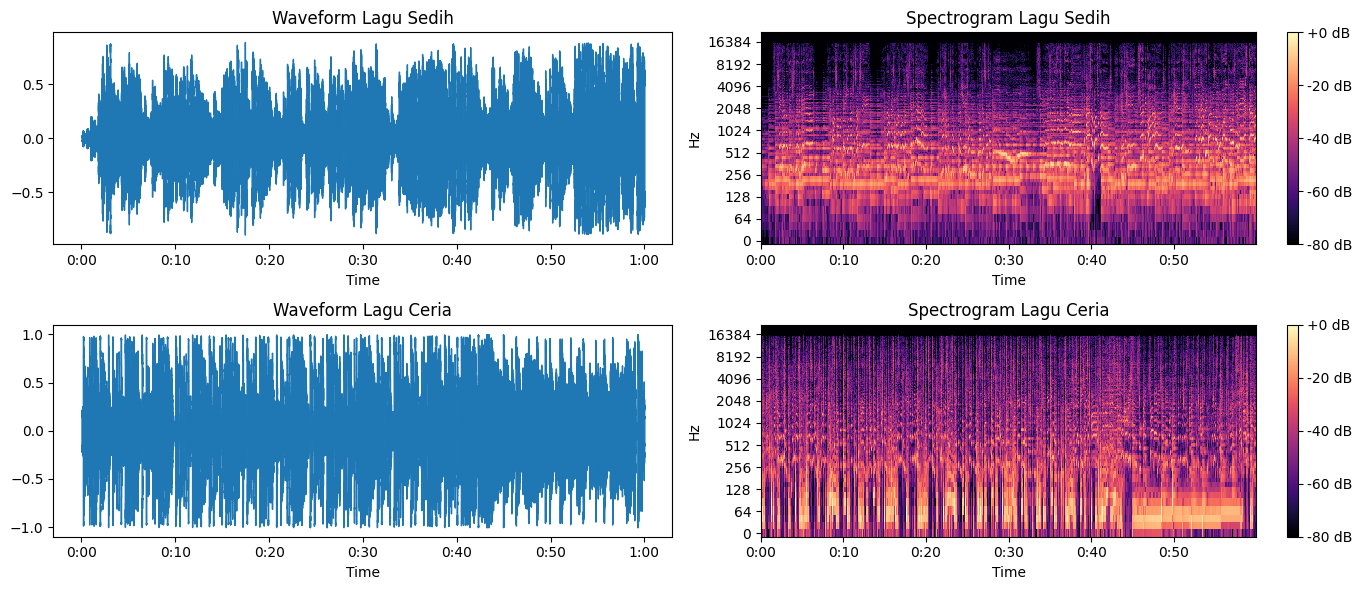

In [30]:
key_names = ['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']

def analyze_song(path):
    y, sr = librosa.load(str(path), sr=None)
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
    key_index = int(np.argmax(np.sum(chroma, axis=1)))
    key = key_names[key_index]
    duration = librosa.get_duration(y=y, sr=sr)
    return y, sr, float(tempo), key, float(duration)

y1, sr1, tempo1, key1, dur1 = analyze_song(base_dir / "data" / "slow_song.wav")
y2, sr2, tempo2, key2, dur2 = analyze_song(base_dir / "data" / "fast_song.wav")

print(f"Lagu Sedih: Tempo = {tempo1:.2f} BPM, Key = {key1}, Duration = {dur1:.2f} seconds")
print(f"Lagu Ceria: Tempo = {tempo2:.2f} BPM, Key = {key2}, Duration = {dur2:.2f} seconds")

#visualisasikan perbandingan
def plot_comparison(y1, sr1, y2, sr2):
    plt.figure(figsize=(14, 6))
    
    plt.subplot(2, 2, 1)
    librosa.display.waveshow(y1, sr=sr1)
    plt.title("Waveform Lagu Sedih")
    
    plt.subplot(2, 2, 2)
    D1 = librosa.amplitude_to_db(np.abs(librosa.stft(y1)), ref=np.max)
    librosa.display.specshow(D1, sr=sr1, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title("Spectrogram Lagu Sedih")
    
    plt.subplot(2, 2, 3)
    librosa.display.waveshow(y2, sr=sr2)
    plt.title("Waveform Lagu Ceria")
    
    plt.subplot(2, 2, 4)
    D2 = librosa.amplitude_to_db(np.abs(librosa.stft(y2)), ref=np.max)
    librosa.display.specshow(D2, sr=sr2, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title("Spectrogram Lagu Ceria")
    
    plt.tight_layout()
    plt.show()
    
plot_comparison(y1, sr1, y2, sr2)



Lagu pertama memiliki Tempo sekitar 73 BPM tergolong sangat lambat dan santai, khas lagu-lagu balada sesuai dengan vibes lagu Bruno Mars "When I was Your Man"
Sedangkan lagu kedua memiliki tempo 136 BPM, lagu ini masuk dalam kategori tempo yang cepat dan energik, sangat umum ditemukan pada genre musik pop, dance, atau rock yang upbeat.

#### 5.2 Remix (Time Stretch, Pitch Shift, Crossfade)

In [31]:
# Gunakan hasil analisis langsung (tidak load ulang)
y_sedih, sr_sedih = y1, sr1
y_ceria, sr_ceria = y2, sr2

# Jika sample rate berbeda, resample lagu ceria ke sr_sedih
if sr_ceria != sr_sedih:
    y_ceria = librosa.resample(y_ceria, orig_sr=sr_ceria, target_sr=sr_sedih)
    sr_ceria = sr_sedih  # sekarang sama

# 1. Stretch SELURUH lagu sedih ke tempo lagu ceria
rate = tempo2 / tempo1
y_sedih_ts = librosa.effects.time_stretch(y=y_sedih, rate=rate)

# 2. Pitch shift dari key lagu sedih ke key lagu ceria
def semitone_shift(k1, k2):
    return key_names.index(k2) - key_names.index(k1)

n_steps = semitone_shift(key1, key2)  # G → D# = +8
y_sedih_final = librosa.effects.pitch_shift(y_sedih_ts, sr=sr_sedih, n_steps=n_steps)

# 3. Potong bagian awal lagu sedih (maks 50 detik)
max_sedih_sec = min(50.0, librosa.get_duration(y=y_sedih_final, sr=sr_sedih))
y_sedih_cut = y_sedih_final[:int(max_sedih_sec * sr_sedih)]

# 4. Potong awal lagu ceria (mulai dari detik ke-5)
offset_ceria_sec = 5.0
start_idx = int(offset_ceria_sec * sr_ceria)
if start_idx >= len(y_ceria):
    y_ceria_cut = np.array([])  # fallback kosong
else:
    y_ceria_cut = y_ceria[start_idx:]

# 5. Crossfade 7 detik
cross_len_sec = 7.0
cross_len = int(cross_len_sec * sr_sedih)

# Pastikan kedua bagian cukup panjang untuk crossfade
if len(y_sedih_cut) < cross_len:
    raise ValueError(f"Lagu sedih terlalu pendek untuk crossfade {cross_len_sec} detik.")
if len(y_ceria_cut) < cross_len:
    raise ValueError(f"Lagu ceria setelah offset terlalu pendek untuk crossfade {cross_len_sec} detik.")

part1 = y_sedih_cut[-cross_len:]
part2 = y_ceria_cut[:cross_len]

# Smooth crossfade (equal-power)
fade_out = np.cos(np.linspace(0, np.pi/2, cross_len))
fade_in  = np.sin(np.linspace(0, np.pi/2, cross_len))
cross = part1 * fade_out + part2 * fade_in

# 6. Gabungkan hasil
result = np.concatenate([
    y_sedih_cut[:-cross_len],
    cross,
    y_ceria_cut[cross_len:]
])

sf.write(base_dir / "data" / "remix_fix.wav", result, sr_sedih)

##### Visualisasi Hasil Remix

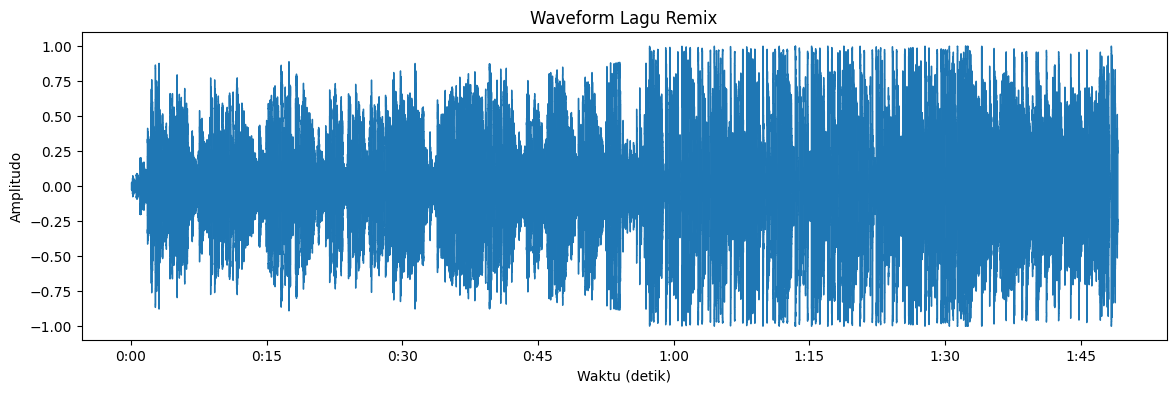

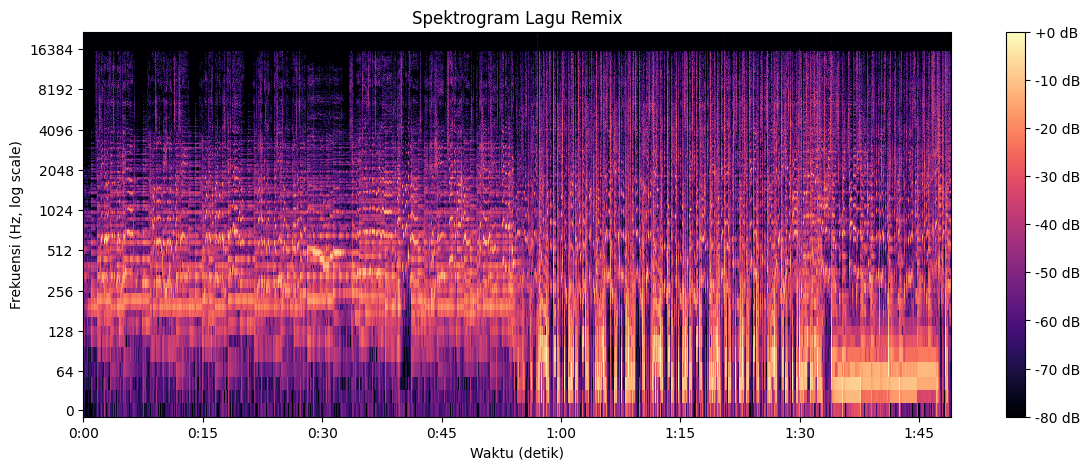

In [20]:
y, sr = librosa.load(base_dir / "data" / "remix_result.wav", sr=None)

plt.figure(figsize=(14, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform Lagu Remix")
plt.xlabel("Waktu (detik)")
plt.ylabel("Amplitudo")
plt.show()

D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(14, 5))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title("Spektrogram Lagu Remix")
plt.xlabel("Waktu (detik)")
plt.ylabel("Frekuensi (Hz, log scale)")
plt.show()

Proses remix ini adalah menggabungkan dua lagu yang sangat berbeda dengan cara mempercepat tempo dan menaikkan nada lagu yang sedih agar selaras dengan lagu yang ceria. Sebuah transisi mulus selama 7 detik kemudian diterapkan menggunakan teknik crossfading untuk menyambungkan bagian awal dari lagu sedih yang telah dimodifikasi dengan bagian utama dari lagu ceria. Hasil akhirnya, seperti yang terlihat pada visualisasi waveform dan spektrogram, adalah sebuah trek audio yang padu dan bertenaga, mengalir secara alami dari 2 lagu yang berbeda nuansa tanpa terasa ada potongan yang janggal.

### REFERENCE

**Link Github:** 
[GitHub.com](https://github.com/harisya14/Sistem_Teknologi_Multimedia)

**Dan dibantu oleh:** Aziz Kurniawan (122140097)

**AI Chat Bot:**
![Screenshoot chat with AI](data/Qwen.jpeg)